In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
df = pd.read_csv('covid_19_data.csv')

In [29]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [30]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2769
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [31]:
cols = df.columns

In [32]:
df.columns = [col.lower() for col in cols]
df.rename(columns= {'observationdate':'Observation_Date',
                    'country/region':'Country',
                    ' province/state':'Province',
                    'last update':'Last_update'} , inplace=True )

df.head()

,sno,Observation_Date,province/state,Country,Last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [33]:
df.drop(['sno', 'province/state' , 'Country' , 'Last_update'] , axis=1 , inplace=True)

In [34]:
df.head()

,Observation_Date,confirmed,deaths,recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0


In [35]:
 df = df.groupby(['Observation_Date']).sum().reset_index()

In [36]:
df['Observation_Date'] = pd.to_datetime(df['Observation_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Observation_Date  57 non-null     datetime64[ns]
 1   confirmed         57 non-null     float64       
 2   deaths            57 non-null     float64       
 3   recovered         57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


In [37]:
min_date = df['Observation_Date'].min()
def substraction(Observation_Date):
    return(Observation_Date - min_date).days + 1


In [38]:
df['day_counts'] = df['Observation_Date'].apply(lambda x: substraction(x))
df.drop(['Observation_Date'] , axis = 1 , inplace=True)
df

,confirmed,deaths,recovered,day_counts
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5
5,2927.0,82.0,61.0,6
6,5578.0,131.0,107.0,7
7,6165.0,133.0,126.0,8
8,8235.0,171.0,143.0,9
9,9925.0,213.0,222.0,10


In [39]:
df['Inflect'] = df['confirmed']-df['recovered']-df['deaths']


In [40]:
Y = df['confirmed']
X = df[['day_counts']]

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2 , shuffle=True , random_state=0)

model = LinReg()
lin_model = model.fit(x_train , y_train)
print(lin_model.intercept_)
print(lin_model.coef_)

-13515.945921733975
[2849.54658007]


In [41]:
y_predict = lin_model.predict(x_test)

In [42]:
R2 = metrics.r2_score(y_test, y_predict)
print('R^2:' , R2)
n = x_test.shape[0] 
p = x_test.shape[1] 
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

R^2: 0.8594173016053027
Adjusted R^2 : 0.845359031765833
Mean Squared Error: 623937243.1602508
Root Mean Squared Error: 24978.73581989791


In [43]:
data = {'prediction':y_predict,
        'real':y_test}

pd.DataFrame(data)

,prediction,real
35,89067.730961,81397.0
34,86218.184381,80415.0
41,106165.010441,92844.0
27,66271.358320,75138.0
11,20678.613039,16787.0
2,-4967.306182,941.0
33,83368.637801,79570.0
56,148908.209143,214915.0
22,52023.625420,60370.0
55,146058.662562,197168.0


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

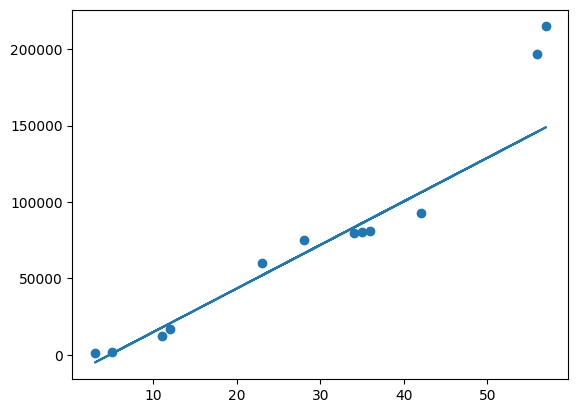

In [45]:
plt.scatter(x_test , y_test)
plt.plot(x_test , y_predict)

In [46]:
Y = df['deaths']
X = df[['day_counts']]

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2 , shuffle=True , random_state=0)

model = LinReg()
lin_model = model.fit(x_train , y_train)
print(lin_model.intercept_)
print(lin_model.coef_)

y_predict = lin_model.predict(x_test)

R2 = metrics.r2_score(y_test, y_predict)
print('R^2:' , R2)
n = x_test.shape[0] 
p = x_test.shape[1] 
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

data = {'prediction':y_predict,
        'real':y_test}

pd.DataFrame(data)

-941.2025969992096
[109.71709906]
R^2: 0.7809576903103308
Adjusted R^2 : 0.7590534593413639
Mean Squared Error: 1670355.741677798
Root Mean Squared Error: 1292.4224315903057


,prediction,real
35,3008.612969,2770.0
34,2898.895870,2708.0
41,3666.915563,3160.0
27,2130.876177,2007.0
11,375.402592,362.0
2,-612.051300,26.0
33,2789.178771,2629.0
56,5312.672049,8733.0
22,1582.290681,1371.0
55,5202.954950,7905.0


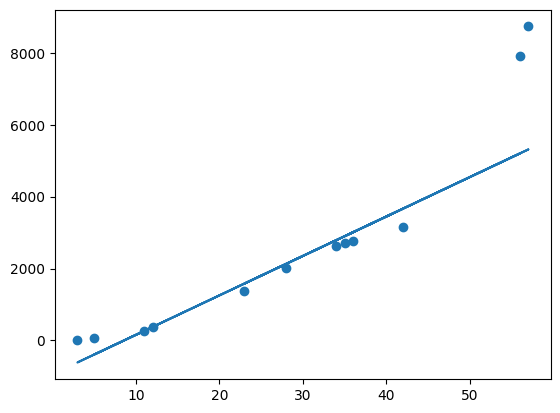

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x_test , y_test)
plt.plot(x_test , y_predict)

In [48]:
Y = df['recovered']
X = df[['day_counts']]

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2 , shuffle=True , random_state=0)

model = LinReg()
lin_model = model.fit(x_train , y_train)
print(lin_model.intercept_)
print(lin_model.coef_)

y_predict = lin_model.predict(x_test)

R2 = metrics.r2_score(y_test, y_predict)
print('R^2:' , R2)
n = x_test.shape[0] 
p = x_test.shape[1] 
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

data = {'prediction':y_predict,
        'real':y_test}

pd.DataFrame(data)

-20029.61325696883
[1605.95697678]
R^2: 0.8918033401991408
Adjusted R^2 : 0.8809836742190549
Mean Squared Error: 90089428.34748404
Root Mean Squared Error: 9491.545098006121


,prediction,real
35,37784.837907,30384.0
34,36178.880930,27905.0
41,47420.579768,48229.0
27,24937.182093,14352.0
11,-758.129536,472.0
2,-15211.742327,36.0
33,34572.923954,25227.0
56,71509.934420,83313.0
22,16907.397209,6295.0
55,69903.977443,80840.0


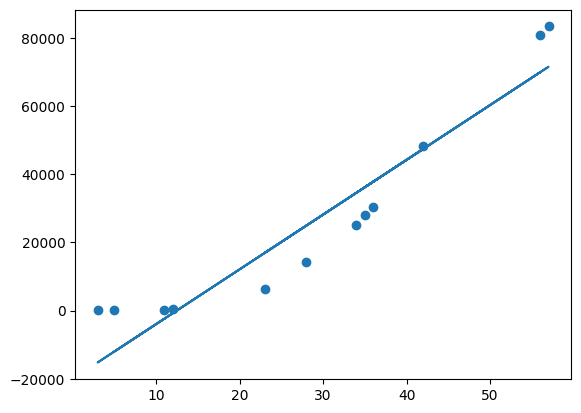

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x_test , y_test)
plt.plot(x_test , y_predict)

In [50]:
Y = df['Inflect']
X = df[['day_counts']]

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2 , shuffle=True , random_state=0)

model = LinReg()
lin_model = model.fit(x_train , y_train)
print(lin_model.intercept_)
print(lin_model.coef_)

y_predict = lin_model.predict(x_test)

R2 = metrics.r2_score(y_test, y_predict)
print('R^2:' , R2)
n = x_test.shape[0] 
p = x_test.shape[1] 
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

data = {'prediction':y_predict,
        'real':y_test}

pd.DataFrame(data)

7454.869932234076
[1133.87250423]
R^2: 0.6728737387768262
Adjusted R^2 : 0.6401611126545088
Mean Squared Error: 439938335.0587308
Root Mean Squared Error: 20974.707031535167


,prediction,real
35,48274.280085,48243.0
34,47140.407580,49802.0
41,55077.515110,41455.0
27,39203.300051,58779.0
11,21061.339983,15953.0
2,10856.487445,879.0
33,46006.535076,51714.0
56,72085.602674,122869.0
22,33533.937530,52704.0
55,70951.730169,108423.0


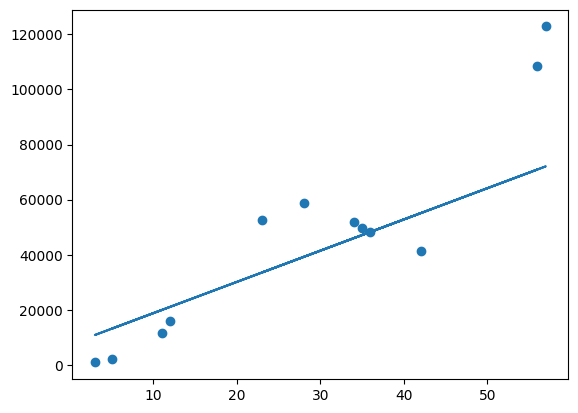

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x_test , y_test)
plt.plot(x_test , y_predict)